In [14]:
import pandas as pd
from time import sleep

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pickle
# transformer?
# other preprocessing?

In [38]:
tracks_and_features_df = pd.read_csv('tracks_and_features.csv')
features_df = pd.read_csv('features.csv')
tracks_clustered_df = pd.read_csv('tracks_clustered_df.csv')

In [3]:
tracks_and_features_df.head(3)

,artist_id,artist_name,track_id,track_name,album_release_date,album_release_date_precision,is_explicit,duration_ms,popularity,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms.1,time_signature,track_href,album_release_year,album_release_decade
0,5ypoEsxvCfwoM8dWqpRQhq,Shamoryo,6YLlHjowYdcrULkRk4r4Ga,Jubel,1900-01-01,day,False,197044,41,0.691,...,0.686000,0.076700,0.269,0.117,125.008,197045,4,https://api.spotify.com/v1/tracks/6YLlHjowYdcr...,1900,1900
1,2WBJQGf1bT1kxuoqziH5g4,Purple Disco Machine,2F2p7b5Xq20mRyEeWYaeUF,Substitution (feat. Julian Perretta),2023-03-30,day,False,181477,81,0.690,...,0.009030,0.000016,0.188,0.713,124.018,181478,4,https://api.spotify.com/v1/tracks/2F2p7b5Xq20m...,2023,2020
2,3MyFDtqB80WZvbtCZRsekM,Bakermat,17B9XlyyYDKkTmPay4z02V,Baianá,2020-10-09,day,False,180842,65,0.587,...,0.000754,0.668000,0.543,0.466,121.964,180843,4,https://api.spotify.com/v1/tracks/17B9XlyyYDKk...,2020,2020


In [4]:
features_df.head(3)

,is_explicit,duration_ms,duration_ms.1,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms.2,duration_ms.3,time_signature
0,False,197044,197045,41,0.691,0.519,0,-7.770,1,0.0353,0.686000,0.076700,0.269,0.117,125.008,197044,197045,4
1,False,181477,181478,81,0.690,0.890,0,-4.866,0,0.0507,0.009030,0.000016,0.188,0.713,124.018,181477,181478,4
2,False,180842,180843,65,0.587,0.722,2,-6.983,0,0.0709,0.000754,0.668000,0.543,0.466,121.964,180842,180843,4


In [5]:
tracks_clustered_df.head(3)

,artist_id,artist_name,track_id,track_name,album_release_date,album_release_date_precision,is_explicit,duration_ms,popularity,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms.1,time_signature,track_href,album_release_year,album_release_decade,cluster_km100
0,5ypoEsxvCfwoM8dWqpRQhq,Shamoryo,6YLlHjowYdcrULkRk4r4Ga,Jubel,1900-01-01,day,False,197044,41,0.691,...,0.076700,0.269,0.117,125.008,197045,4,https://api.spotify.com/v1/tracks/6YLlHjowYdcr...,1900,1900,43
1,2WBJQGf1bT1kxuoqziH5g4,Purple Disco Machine,2F2p7b5Xq20mRyEeWYaeUF,Substitution (feat. Julian Perretta),2023-03-30,day,False,181477,81,0.690,...,0.000016,0.188,0.713,124.018,181478,4,https://api.spotify.com/v1/tracks/2F2p7b5Xq20m...,2023,2020,23
2,3MyFDtqB80WZvbtCZRsekM,Bakermat,17B9XlyyYDKkTmPay4z02V,Baianá,2020-10-09,day,False,180842,65,0.587,...,0.668000,0.543,0.466,121.964,180843,4,https://api.spotify.com/v1/tracks/17B9XlyyYDKk...,2020,2020,53


# Model km200 (n_clusters = 200)

In [6]:
audio_features_model_on = ['is_explicit','popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']
features_df = features_df[audio_features_model_on]

In [7]:
km200 = KMeans(200)
scaler200 = MinMaxScaler()
scaled_features = scaler200.fit_transform(features_df)
km200.fit(scaled_features)

KMeans(n_clusters=200)

In [8]:
scaled_features

array([[0.        , 0.41      , 0.70010132, ..., 0.117     , 0.51779013,
        0.8       ],
       [0.        , 0.81      , 0.69908815, ..., 0.713     , 0.51368949,
        0.8       ],
       [0.        , 0.65      , 0.59473151, ..., 0.466     , 0.50518171,
        0.8       ],
       ...,
       [0.        , 0.23      , 0.47922999, ..., 0.781     , 0.4122464 ,
        0.8       ],
       [1.        , 0.24      , 0.39412361, ..., 0.173     , 0.42849569,
        0.8       ],
       [0.        , 0.24      , 0.15096251, ..., 0.134     , 0.42066306,
        0.8       ]])

In [9]:
km200.labels_

array([ 23,  53, 196, ...,  65, 117,  77])

In [10]:
tracks_clustered_df = tracks_clustered_df.copy()
tracks_clustered_df['cluster_km200'] = km200.labels_
tracks_clustered_df[tracks_clustered_df['cluster_km200']==4].sample(1)

,artist_id,artist_name,track_id,track_name,album_release_date,album_release_date_precision,is_explicit,duration_ms,popularity,danceability,...,liveness,valence,tempo,duration_ms.1,time_signature,track_href,album_release_year,album_release_decade,cluster_km100,cluster_km200
17402,2wNYw9h0N78tk6nR0F0aQ4,The Requiem,4dlPsqaKyDAejnHoc1fPCK,Kill The Lights,2024-01-05,day,True,180945,35,0.463,...,0.308,0.327,110.0,180945,4,https://api.spotify.com/v1/tracks/4dlPsqaKyDAe...,2024,2020,29,4


In [11]:
# saving/dumping
with open('km200.pickle', 'wb') as handle:
    pickle.dump(km200, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('scaler200.pickle', 'wb') as handle:
    pickle.dump(scaler200, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Model km100_2 --> less columns

In [16]:
audio_features_model_on_2 = ['danceability', 'energy', 'key',
        'mode', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence']
features_df_2 = features_df[audio_features_model_on_2]
features_df_2.head(3)

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.691,0.519,0,1,0.0353,0.686000,0.076700,0.269,0.117
1,0.690,0.890,0,0,0.0507,0.009030,0.000016,0.188,0.713
2,0.587,0.722,2,0,0.0709,0.000754,0.668000,0.543,0.466


In [17]:
km100_2 = KMeans(100)
scaler_2 = MinMaxScaler()
scaled_features_2 = scaler_2.fit_transform(features_df)
km100_2.fit(scaled_features_2)

KMeans(n_clusters=100)

In [21]:
scaled_features_2

array([[0.        , 0.12030334, 0.11269364, ..., 0.12030334, 0.11269364,
        0.8       ],
       [0.        , 0.11079906, 0.10310713, ..., 0.11079906, 0.10310713,
        0.8       ],
       [0.        , 0.11041136, 0.10271608, ..., 0.11041136, 0.10271608,
        0.8       ],
       ...,
       [0.        , 0.0600491 , 0.05191752, ..., 0.0600491 , 0.05191752,
        0.8       ],
       [1.        , 0.11453495, 0.10687473, ..., 0.11453495, 0.10687473,
        0.8       ],
       [0.        , 0.1066193 , 0.0988906 , ..., 0.1066193 , 0.0988906 ,
        0.8       ]])

In [22]:
km100_2.labels_

array([97,  0, 94, ..., 59, 83, 53])

In [23]:
tracks_clustered_df = tracks_clustered_df.copy()
tracks_clustered_df['cluster_km100_2'] = km100_2.labels_
tracks_clustered_df[tracks_clustered_df['cluster_km100_2']==4].sample(1)

,artist_id,artist_name,track_id,track_name,album_release_date,album_release_date_precision,is_explicit,duration_ms,popularity,danceability,...,liveness,valence,tempo,duration_ms.1,time_signature,track_href,album_release_year,album_release_decade,cluster_km100,cluster_km100_2
34723,56P5wn7V6w46OyYV9vS5jC,Klik & Frik,3DE5UpRmIHUtQFqvpqKAZg,El Plan - Cyma Remix,2023-10-20,day,False,237488,40,0.572,...,0.105,0.702,180.044,237488,4,https://api.spotify.com/v1/tracks/3DE5UpRmIHUt...,2023,2020,79,4


In [24]:
with open('km100_2.pickle', 'wb') as handle:
    pickle.dump(km100_2, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('scaler_2.pickle', 'wb') as handle:
    pickle.dump(scaler_2, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Compare

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [26]:
def model_plot(labels,df):
    # retrieve unique clusters
    clusters = np.unique(labels)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = np.where(labels == cluster)
        # create scatter of these samples
        plt.scatter(df.to_numpy()[row_ix, 0], df.to_numpy()[row_ix,1])
        plt.xlabel("energy")
        plt.ylabel("instrumentalness")
        # show the plot
    plt.show()

In [27]:
# change the x.y labels

def model_plot2(labels,df):
    # retrieve unique clusters
    clusters = np.unique(labels)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = np.where(labels == cluster)
        # create scatter of these samples
        plt.scatter(df.to_numpy()[row_ix, 0], df.to_numpy()[row_ix,1])
        plt.xlabel("danceability")
        plt.ylabel("speechiness")
        # show the plot
    plt.show()

In [39]:
# load models with pickle

with open('model_km100.pickle', 'rb') as handle:
    km100 = pickle.load(handle)

with open('scaler.pickle', 'rb') as handle:
    scaler = pickle.load(handle)

with open('km100_2.pickle', 'rb') as handle:
    km100_2 = pickle.load(handle)

with open('scaler_2.pickle', 'rb') as handle:
    scaler_2 = pickle.load(handle)

with open('km200.pickle', 'rb') as handle:
    km200 = pickle.load(handle)

with open('scaler200.pickle', 'rb') as handle:
    scaler200 = pickle.load(handle)

In [40]:
km100.labels_

array([43, 23, 53, ..., 87, 45,  8])

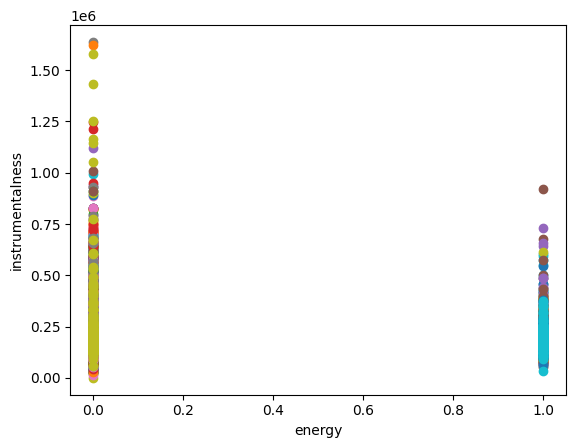

In [41]:
labels_1 = km100.labels_
model_plot(labels_1,features_df)

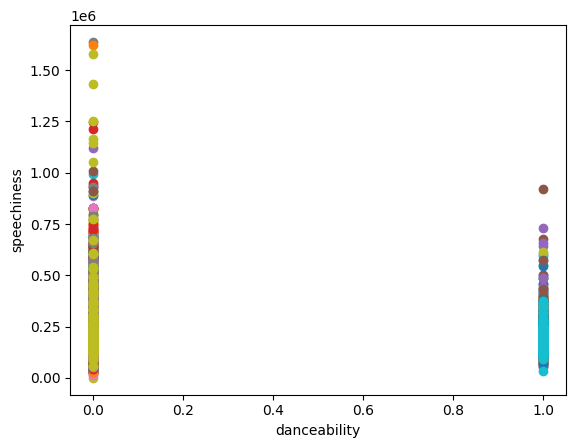

In [31]:
model_plot2(labels_1,features_df)

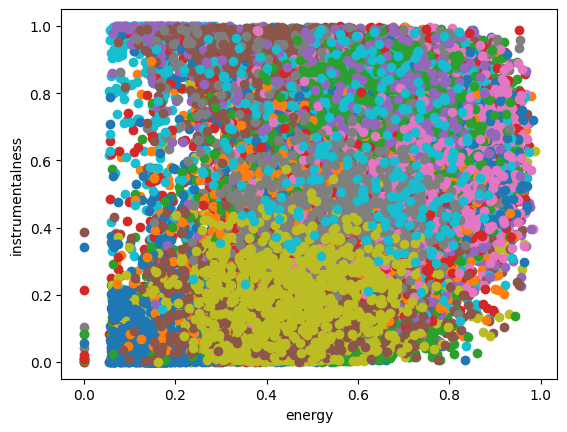

In [42]:
labels_2 = km100_2.labels_
model_plot(labels_2,features_df_2)

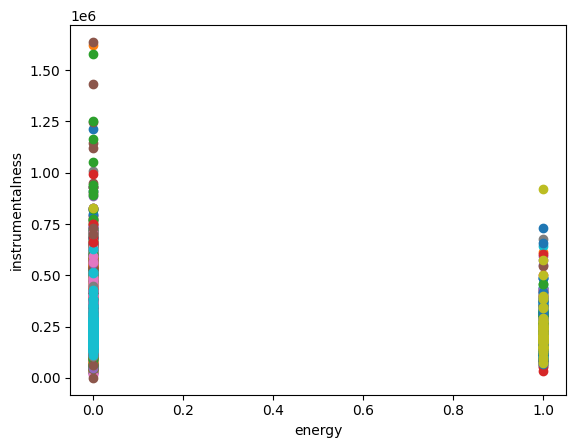

In [37]:
labels_3 = km200.labels_
model_plot(labels_3,features_df)

In [43]:
tracks_clustered_df = tracks_clustered_df.copy()
tracks_clustered_df['cluster_km100_2'] = km100_2.labels_
tracks_clustered_df[tracks_clustered_df['cluster_km100_2']==4].sample(1)

,artist_id,artist_name,track_id,track_name,album_release_date,album_release_date_precision,is_explicit,duration_ms,popularity,danceability,...,liveness,valence,tempo,duration_ms.1,time_signature,track_href,album_release_year,album_release_decade,cluster_km100,cluster_km100_2
16054,5ti5FPHgtaSf15KcUisZMt,maye,1jecO8NeYLsVWVptITz4c1,Tú,2019-09-06,day,False,206611,67,0.732,...,0.112,0.73,114.982,206612,4,https://api.spotify.com/v1/tracks/1jecO8NeYLsV...,2019,2010,26,4


In [44]:
tracks_clustered_df = tracks_clustered_df.copy()
tracks_clustered_df['cluster_km200'] = km200.labels_
tracks_clustered_df[tracks_clustered_df['cluster_km200']==4].sample(1)

,artist_id,artist_name,track_id,track_name,album_release_date,album_release_date_precision,is_explicit,duration_ms,popularity,danceability,...,valence,tempo,duration_ms.1,time_signature,track_href,album_release_year,album_release_decade,cluster_km100,cluster_km100_2,cluster_km200
21938,467M2s2YxXdlL2ZpDUNL3A,Paleface Swiss,0ioB64ttCtpxVvoQsaqVQH,The Gallow,2023-10-31,day,True,298347,55,0.36,...,0.369,179.484,298348,4,https://api.spotify.com/v1/tracks/0ioB64ttCtpx...,2023,2020,57,32,4


In [45]:
tracks_clustered_df.to_csv('tracks_clustered_df2.csv', index=False) # save our dataset with cluster info